# Develop LSTM Models for Univariate Time Series forecasting 

In [2]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [4]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [8]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [10]:
X.shape

(6, 3)

In [14]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Building LSTM Model 

In [17]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

C:\Users\manis\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 30968.3672
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 30520.6504
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 30088.3262
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 29679.1035
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 29291.3770
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 28916.6875
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 28548.3984
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 28184.5879
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 27824.7734
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 27467.8027
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 27112.0605
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 26753.8906
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 26396.3594
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 26019.8594
Epoch 15/300
1/1 ━━━━━━━━━━━━━━

# Predicting for the next 10 data 

In [22]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.82355]
1 day input [196.         210.         225.82354736]
1 day output [[237.65872]]
2 day input [210.         225.82354736 237.65872192]
2 day output [[253.05714]]
3 day input [225.82355 237.65872 253.05714]
3 day output [[269.14706]]
4 day input [237.65872 253.05714 269.14706]
4 day output [[283.75894]]
5 day input [253.05714 269.14706 283.75894]
5 day output [[301.0317]]
6 day input [269.14706 283.75894 301.0317 ]
6 day output [[318.82867]]
7 day input [283.75894 301.0317  318.82867]
7 day output [[336.56442]]
8 day input [301.0317  318.82867 336.56442]
8 day output [[356.47903]]
9 day input [318.82867 336.56442 356.47903]
9 day output [[377.13455]]
[225.82355, 237.65872, 253.05714, 269.14706, 283.75894, 301.0317, 318.82867, 336.56442, 356.47903, 377.13455]


In [24]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [26]:
len(timeseries_data)

9

In [28]:
lst_output

[225.82355,
 237.65872,
 253.05714,
 269.14706,
 283.75894,
 301.0317,
 318.82867,
 336.56442,
 356.47903,
 377.13455]

In [34]:
import matplotlib.pyplot as plt

In [36]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

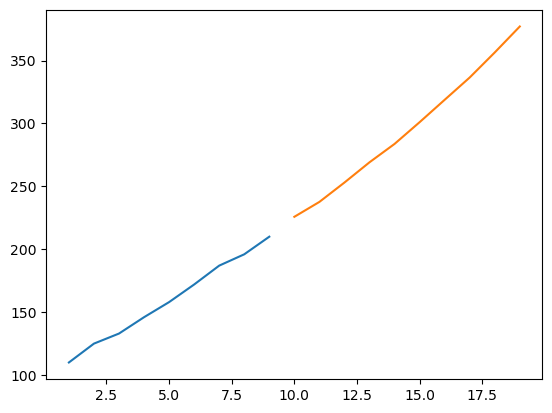

In [38]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)